In [2]:
import pandas as pd
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import math as math
import sympy as sym
from IPython.display import display, Latex

# Obtención de datos

In [3]:
Distancia = pd.read_csv("distancia.csv",sep=";")
Grados = pd.read_csv("grados.csv",sep=";")
Presion = pd.read_csv("presion.csv",sep=";")

In [4]:
distancia = Distancia["Distance"].to_numpy()
N1 = Distancia["N"].to_numpy()
grados = Grados["Degree"].to_numpy()
N2 = Grados["N"].to_numpy()
presion =Presion["Pressure"].to_numpy()
N3 = Presion["N"].to_numpy()

# Regresión de la relación entre $d_N$ y $N$ 

-4.895283653486738e-07 1.9988827493719445e-07


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

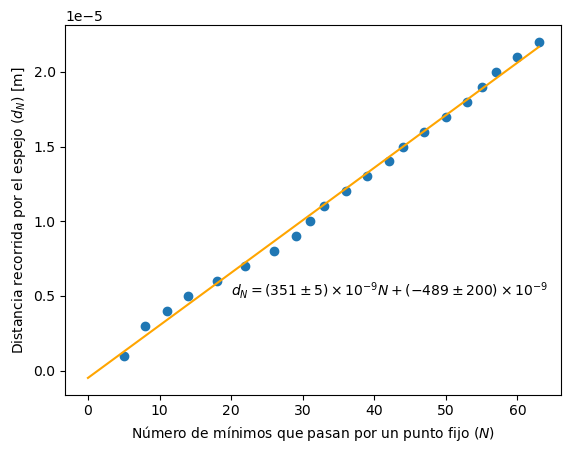

In [16]:
plt.scatter(N1,distancia*1e-6)
(a,b),cov = np.polyfit(N1,distancia*1e-6,1,cov=True)
x = np.linspace(0,63)
y = a*x + b
plt.plot(x,y,"orange")
plt.xlabel(r"Número de mínimos que pasan por un punto fijo ($N$)")
plt.text(20,0.5e-5,r"$d_N = (351 \pm 5)\times 10^{-9} N + (-489 \pm 200)\times 10^{-9} $")
plt.ylabel(r"Distancia recorrida por el espejo ($d_N$) [m]")
plt.savefig("distancia.pdf")
a,b, np.sqrt(np.diag(cov))
print(b,np.sqrt(np.diag(cov))[1])
display(Latex(f"Pendiente de la regresión a: $(351 \pm 5)$ nm"))
display(Latex(f"Punto de corte de la regresión a: $(-489 \pm 200)$ nm"))

Dado que la regresión tiene la forma $$y = ax + b$$ y $a$ correspondería con el valor de la pendiente $a = \frac{d_N}{N}$ entonces la longitud de onda del láser estaría dada por $$\lambda_{\text{láser}} = 2a$$

In [17]:
def GetPropagation(expr,vars,sigmas,measures):
    prop = 0
    for i in range(len(measures)):
        prop += expr.diff(var[i])**2 * sigmas[i]**2
    
    sigma = sym.sqrt(prop)
    #Sección para soltar el valor calculado y la incertidumbre del valor calculado. 
    
    sigma = sym.lambdify(var,sigma)
    mean = sym.lambdify(var,exp)
    print(mean)
    return mean(*measures),sigma(*measures)

a__ = sym.Symbol("a")
exp = 2*a__
var = np.array([a__])
mea = np.array([a])
un = np.array([np.sqrt(np.diag(cov))[0]])

GetPropagation(exp,var,un,mea)

<function _lambdifygenerated at 0x0000016A66962B80>


(7.033111592794679e-07, 1.01373752217659e-08)

Luego de hacer la hacer la propagación de errores se obtiene que el valor de la longitud del láser es de $$\lambda_{\text{láser}} = (703 \pm 10) \ \text{nm}$$

## Regresión de la relación entre $\theta$ y $N$

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

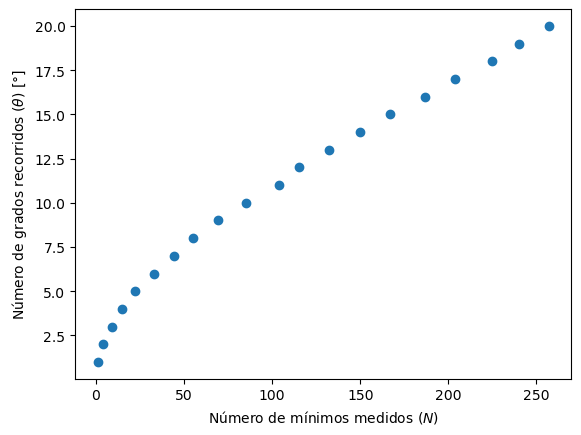

In [125]:
plt.scatter(N2,grados)

a,b = np.polyfit(N2,grados,1)
x = np.linspace(0,250)
y = a*x + b
# plt.plot(x,y,"orange")
plt.xlabel(r"Número de mínimos medidos ($N$)")
plt.ylabel(r"Número de grados recorridos ($\theta$) [°]")
#plt.text(50,5,r"$y= %sN -%s$"%(round(a,3),round(b,3)))
plt.savefig("grados.pdf")
a,b
grados

# Cálculo del coeficiente de refracción del vidrio

La ecuación para el coeficiente de refracción de un elemento está dado por 
$$\eta_{\text{vidrio}} = \frac{(2t-N\lambda)(1-\cos\theta)}{2t(1-\cos\theta)-N\lambda}$$

In [126]:
t = 0.59e-2
lambda_ = 633e-9

eta_vidrio = ((2*t - N2*lambda_)*( (np.pi*grados/180)**2 / 2 ))/(2*t*((np.pi*grados/180)**2 / 2)-N2*lambda_)
np.mean(eta_vidrio),np.std(eta_vidrio)

(1.4087718133453344, 0.08267824191284308)

## Otra forma de calcular el coeficiente de refracción del vidrio

Se puede calcular el coeficiente de refracción del vidrio al encontrar al hacer $\eta_{\text{vidrio}}$ un coeficiente de la función $\theta$ encontrada como aproximación a segundo orden de la ecuación mostrada anteriormente. 

C:\Users\juank\AppData\Local\Temp\ipykernel_33100\2015007465.py:4: RuntimeWarning: invalid value encountered in sqrt
  return (np.sqrt(num/den))*(180/np.pi)


(0.0660176389425203*sqrt(N/(6.33e-7*N + 0.00312494911873176)),
 array([1.04867522]),
 array([0.00141028]))

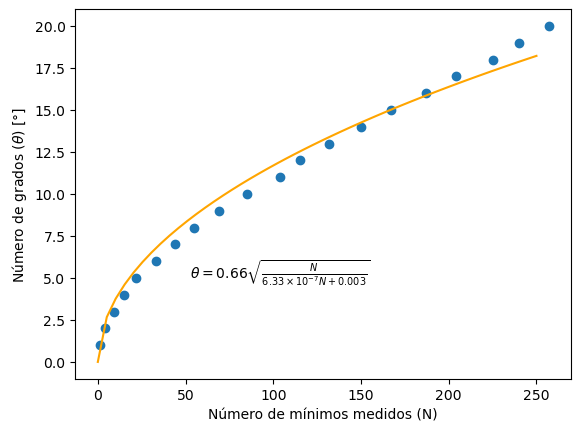

In [135]:
def theta(N,eta):
    num = 2*N*633e-9*eta
    den = 2*3.21e-2*eta - 2*3.21e-2 + N*633e-9
    return (np.sqrt(num/den))*(180/np.pi)


def theta_prim(N,eta):
    num = 2*N*633e-9*eta
    den = 2*3.21e-2*eta - 2*3.21e-2 + N*633e-9
    return (sym.sqrt(num/den))*(180/np.pi)

mea,sig = optimize.curve_fit(theta,N2,grados,p0=np.array([1.4]))
mea,np.sqrt(np.diag(sig))

theta__ = theta(np.linspace(0,250),mea[0])
plt.scatter(N2,grados)
plt.plot(np.linspace(0,250),theta__,color="orange")
plt.ylabel(r"Número de grados ($\theta$) [°]")
plt.xlabel(r"Número de mínimos medidos (N)")
plt.text(50,5,r" $\theta =0.66\sqrt{\frac{N}{6.33\times 10^{-7} N + 0.003}}$")

plt.savefig("glass.pdf")

N = sym.Symbol("N")

theta_prim(N,mea[0]),mea,np.sqrt(np.diag(sig))

# Cálculo del coeficiente de refracción del aire a medida que la presión desciende

(2.907964053300278, 0.07065385807250557)

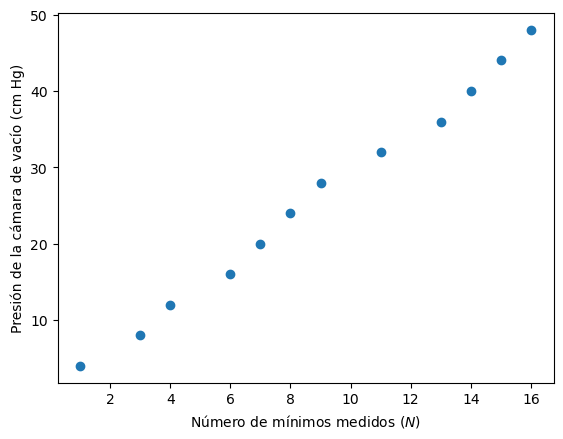

In [136]:
plt.scatter(N3,presion)

a,b = np.polyfit(N3,presion,1)
x = np.linspace(0,N3[-1])
y = a*x + b
#plt.plot(x,y,"orange")
plt.xlabel(r"Número de mínimos medidos ($N$)")
plt.ylabel(r"Presión de la cámara de vacío (cm Hg)")
#plt.text(np.mean(N3),np.mean(y)-3,r"$y= %sN -%s$"%(round(a,3),round(b,3)))
plt.savefig("presion.pdf")
a,b

In [143]:
slope = N3[-1]*lambda_/(2*3.21e-2*(presion[-1]-presion[0]))
slope

var = sym.symbols("t P")

mea = np.array([3.21e-2,presion[-1]-presion[0]])
un = np.array([0.05e-3,2.5])

exp = N3[-1]*lambda_/(2*var[0]*var[1])

GetPropagation(exp,np.array([var[0],var[1]]),un,mea)


<function _lambdifygenerated at 0x0000016A6D30F040>


(3.585386576040782e-06, 2.037916825894403e-07)

2.28e-05

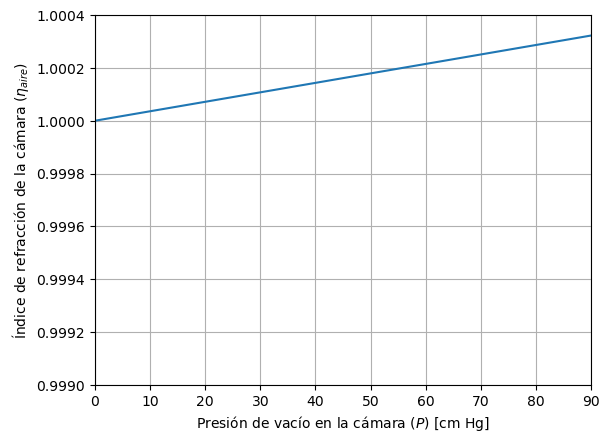

In [139]:
press = np.linspace(0,90)

y = slope*press +1

plt.plot(press,y)
plt.ylim(0.999,1.0004)
plt.xlim(0,90)
plt.grid()
plt.ylabel(r"Índice de refracción de la cámara ($\eta_{aire}$)")
plt.xlabel(r"Presión de vacío en la cámara ($P$) [cm Hg]")
plt.savefig("presion_n_refraccion.pdf")
slope

slope*76 +1,0.3e-6*76

0.0000228